# 区間推定と仮説検定
- 統計検定2級 統計学基礎より
    - L = np.array([90, 76, 90, 64, 86, 51, 72, 90, 95, 78])
    - H = np.array([ 73, 102, 118, 104,  81, 107, 100,  87, 117, 111])
    - C = np.array([116,  68,  32, 142, 110,  56,  94,  64,  92, 104])

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, describe, t
import pingouin as pg
from itertools import combinations

In [2]:
# import unicodedata
# L = '９０ ７６ ９０ ６４ ８６ ５１ ７２ ９０ ９５ ７８'
# H =  '７３ １０２ １１８ １０４ ８１ １０７ １００ ８７ １１７ １１１'
# C = '１１６ ６８ ３２ １４２ １１０ ５６ ９４ ６４ ９２ １０４'
# L = np.array([int(i) for i in unicodedata.normalize('NFKC', L).split()])
# H = np.array([int(i) for i in unicodedata.normalize('NFKC', H).split()])
# C = np.array([int(i) for i in unicodedata.normalize('NFKC', C).split()])
DATA = {
    'L': np.array([90, 76, 90, 64, 86, 51, 72, 90, 95, 78]),
    'H': np.array([ 73, 102, 118, 104,  81, 107, 100,  87, 117, 111]),
    'C': np.array([116,  68,  32, 142, 110,  56,  94,  64,  92, 104]),
}
DATA = {
    'L': [90, 76, 90, 64, 86, 51, 72, 90, 95, 78],
    'H': [ 73, 102, 118, 104,  81, 107, 100,  87, 117, 111],
    'C': [116,  68,  32, 142, 110,  56,  94,  64,  92, 104],
}

# データの可視化
- 箱ひげ図
- 散布図

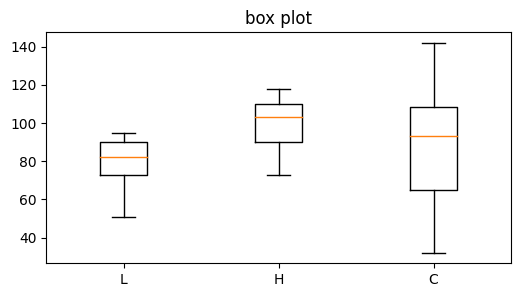

In [3]:
pltData = [value for value in DATA.values()]
pltLabel = [key for key in DATA.keys()]

fig, ax = plt.subplots(figsize=(6, 3))
# 箱ひげ図 sym : 外れ値
ax.boxplot(pltData, labels=pltLabel, sym='gD')
ax.set_title('box plot')
plt.show()

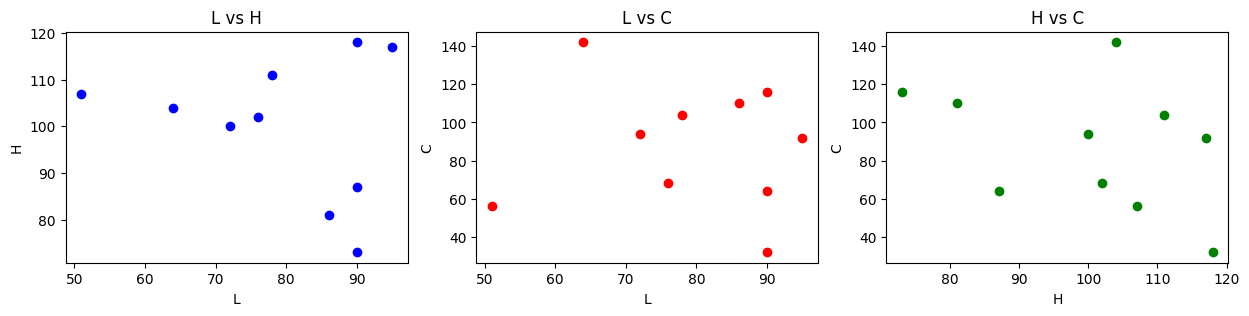

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
color = ['b', 'r', 'g']
for i, (first, second) in enumerate(list(combinations(DATA.keys(), 2))):
    ax[i].scatter(DATA[first], DATA[second], color=color[i])
    ax[i].set_title(f'{first} vs {second}')
    ax[i].set_xlabel(first)
    ax[i].set_ylabel(second)
    
plt.show()

# 統計量
- pandas : describe により各統計量を表示
- scipy  : describe により データ数、最小最大、平均、不偏分散、歪度、尖度
- numpy  : np.min(), np.max(), np.mean(), np.var(), np.std() などにより各統計量を表示

In [5]:
# pandas
df = pd.DataFrame(DATA)
# print(df.std(ddof=1))
df.describe()

,L,H,C
count,10.000000,10.000000,10.000000
mean,79.200000,100.000000,87.800000
std,13.886844,15.136417,32.706778
min,51.000000,73.000000,32.000000
25%,73.000000,90.250000,65.000000
50%,82.000000,103.000000,93.000000
75%,90.000000,110.000000,108.500000
max,95.000000,118.000000,142.000000


In [6]:
# scipy
def describe_results_by_scipy(data):
    describeResults = list(describe(data))
    stats = ['nobs', 'minmax', 'mean', 'variance', 'skewness', 'kurtosis']
    for stat, result in zip(stats, describeResults):
        print(f'{stat} : {result}')

describe_results_by_scipy(DATA['L'])

nobs : 10
minmax : (51, 95)
mean : 79.2
variance : 192.84444444444446
skewness : -0.8006692641981255
kurtosis : -0.3646334947705996


In [7]:
# numpy
def describe_results_by_numpy(data):
    describeResults = np.min(data), np.max(data), np.mean(data), np.var(data, ddof=1), np.std(data, ddof=1), np.quantile(DATA['L'], q=0.25), np.quantile(DATA['L'], q=0.5), np.quantile(DATA['L'], q=0.75)
    stats = ['min', 'max', 'mean', 'variance', 'std', '25%', '50%', '75%'] 
    for stat, result in zip(stats, describeResults):
        print(f'{stat} : {result}')

describe_results_by_numpy(DATA['L'])


min : 51
max : 95
mean : 79.2
variance : 192.84444444444443
std : 13.88684429395118
25% : 73.0
50% : 82.0
75% : 90.0


# 相関係数

In [8]:
for f, s in list(combinations(DATA.keys(), 2)):
    print(f'correlation coefficient {f} vs {s} : {df.corr().loc[f,s]:.03f}')
df.corr()

correlation coefficient L vs H : -0.199
correlation coefficient L vs C : -0.065
correlation coefficient H vs C : -0.376


,L,H,C
L,1.000000,-0.198755,-0.064975
H,-0.198755,1.000000,-0.375709
C,-0.064975,-0.375709,1.000000


# 偏相関係数

In [9]:
# 偏相関係数
for f, s in list(combinations(DATA.keys(), 2)):
    print(f'partial correlation coefficient {f} vs {s} : {pg.pcorr(df).loc[f,s]:.03f}')
pg.pcorr(df)

partial correlation coefficient L vs H : -0.241
partial correlation coefficient L vs C : -0.154
partial correlation coefficient H vs C : -0.397


,L,H,C
L,1.000000,-0.241319,-0.153756
H,-0.241319,1.000000,-0.397374
C,-0.153756,-0.397374,1.000000


# T 値
$$

$$

In [10]:
muL = np.mean(DATA['L'])
varL = np.var(DATA['L'], ddof=1)
muH = np.mean(DATA['H'])
varH = np.var(DATA['H'], ddof=1)
n = df.shape[0]
print(f'L mean : {muL}')
print(f'L std : {np.sqrt(varL)}')
print(f'H mean : {muH}')
print(f'H std : {np.sqrt(varH)}')
tValue = (muL - muH) / np.sqrt(varL / n + varH / n)
print(f't value : {tValue}')

L mean : 79.2
L std : 13.88684429395118
H mean : 100.0
H std : 15.136416719656971
t value : -3.202063796256733


# P 値
- 両側検定 (Welch仮定、等分散仮定)
- 片側 less (Welch仮定、等分散仮定)
- 片側 greater (Welch仮定、等分散仮定)

In [11]:
# Welch の方法
tValueW, pValueW = ttest_ind(DATA['L'], DATA['H'], equal_var=True, alternative='two-sided')
print(tValueW, pValueW)
# 等分散の仮定
tValue, pValue = ttest_ind(DATA['L'], DATA['H'], equal_var=False, alternative='two-sided')
print(tValue, pValue)

-3.202063796256733 0.004940025960533674
-3.202063796256733 0.004975290113360172


In [12]:
# Welch の方法
tValueW, pValueW = ttest_ind(DATA['L'], DATA['H'], equal_var=True, alternative='less')
print(tValueW, pValueW)
# 等分散の仮定
tValue, pValue = ttest_ind(DATA['L'], DATA['H'], equal_var=False, alternative='less')
print(tValue, pValue)

-3.202063796256733 0.002470012980266837
-3.202063796256733 0.002487645056680086


In [13]:
# Welch の方法
tValueW, pValueW = ttest_ind(DATA['L'], DATA['H'], equal_var=True, alternative='greater')
print(tValueW, pValueW)
# 等分散の仮定
tValue, pValue = ttest_ind(DATA['L'], DATA['H'], equal_var=False, alternative='greater')
print(tValue, pValue)

-3.202063796256733 0.9975299870197332
-3.202063796256733 0.9975123549433199


# 区間推定
- 母平均
- 母分散
$$ X \sim N(\mu, \ \sigma^2) \rightarrow \bar{X} \sim N \Big(\mu, \ \frac{\sigma^2}{n} \Big) $$
$$ \mu = \bar{x} \pm t_{\alpha/2} \sqrt{\frac{\hat{\sigma}^2}{n}} $$

$$
\frac{(n-1)\hat{\sigma}^2}{\chi^2_{a/2}(n-1)} \leq \sigma^2 \leq \frac{(n-1)\hat{\sigma}^2}{\chi^2_{1-a/2}(n-1)}
$$

In [14]:
# 母平均 95% 信頼区間
alpha = 0.95
cl_bottom, cl_up = t.interval(alpha, n-1, loc=muL, scale=np.sqrt(varL/n))
print(f'L mean : {muL:.02f}')
print(f'L std : {np.sqrt(varL):.02f}')
print(f'confidence_interval : [{cl_bottom:.02f}, {cl_up:.02f}]')


L mean : 79.20
L std : 13.89
confidence_interval : [69.27, 89.13]


# 回帰分析

In [16]:
# model_lr = LinearRegression()
# x, y = df[['x']], df[['y']]
# model_lr.fit(x, y)

# print(f'regression coefficient w1: {model_lr.coef_[0][0]:.3f}')
# print(f'intercept w2: {model_lr.intercept_[0]:.3f}')
# print(f'y = {model_lr.coef_[0][0]:.03f}x + {model_lr.intercept_[0]:.03f}')

# plt.plot(df.x, df.y, 'o')
# plt.plot(df.x, model_lr.predict(x))
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('sciket-learn')
# plt.show()